In [166]:
import requests
import json
from bs4 import BeautifulSoup
import lxml
import pandas as pd
from highlight_text import fig_text
from mplsoccer import VerticalPitch,Pitch
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
import seaborn as sns
from adjustText import adjust_text
from urllib.request import urlopen
from PIL import Image
from mplsoccer import Pitch, add_image
plt.style.use('default')
import matplotlib.font_manager as fm
import os
from ast import Try
import numpy as np
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from bidi.algorithm import get_display
import arabic_reshaper

In [167]:
df = pd.read_csv(r"C:\Users\YahyaRashwan\Desktop\Whoscored Data\Ateltico VS Real Madrid\city vs sevilla event data.csv",encoding='latin1',header=0)
df = df[(df.x!=None)].reset_index(drop=True)

In [168]:
Names_df = pd.read_csv(r"C:\Users\YahyaRashwan\Desktop\Whoscored Data\Ateltico VS Real Madrid\city vs sevilla names.csv",encoding='latin1',header=0)

In [169]:
df = df.loc[(df.teamId==167)].reset_index(drop=True)

In [170]:
df =df[["minute","second","x","y","endX","endY","playerId","Action","Outcome","isTouch","isGoal",'qualifiers/4/type/displayName','qualifiers/6/type/displayName','qualifiers/11/type/displayName']]

In [171]:
df

,minute,second,x,y,endX,endY,playerId,Action,Outcome,isTouch,isGoal,qualifiers/4/type/displayName,qualifiers/6/type/displayName,qualifiers/11/type/displayName
0,0,0.0,0.0,0.0,NaN,NaN,NaN,Start,Successful,False,NaN,NaN,NaN,NaN
1,0,0.0,50.0,50.1,38.0,53.2,315227.0,Pass,Successful,True,NaN,StandingSave,NaN,NaN
2,0,3.0,39.5,63.9,33.5,90.0,303139.0,Pass,Successful,True,NaN,PassEndX,NaN,NaN
3,0,5.0,38.0,88.8,29.5,71.9,355110.0,Pass,Successful,True,NaN,PassEndY,NaN,NaN
4,0,7.0,23.9,70.8,24.1,29.3,313171.0,Pass,Successful,True,NaN,StandingSave,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,92,45.0,36.0,47.8,NaN,NaN,270446.0,BallTouch,Successful,True,NaN,NaN,NaN,NaN
879,93,10.0,5.5,57.9,11.9,81.6,313171.0,Pass,Successful,True,NaN,PassEndY,NaN,NaN
880,93,16.0,0.0,0.0,NaN,NaN,NaN,End,Successful,False,NaN,NaN,NaN,NaN
881,0,0.0,0.0,0.0,NaN,NaN,NaN,End,Successful,False,NaN,NaN,NaN,NaN


In [172]:
df=df.dropna(subset=['playerId','x','y']).reset_index(drop=True)

In [173]:
df['Player Name'] = 0
for i in range(len(df)):
    for x in range(len(Names_df)):
        if df["playerId"][i]== Names_df["Id"][x]:
            df["Player Name"][i]= Names_df["PlayerName"][x]

In [174]:
df.columns

Index(['minute', 'second', 'x', 'y', 'endX', 'endY', 'playerId', 'Action',
       'Outcome', 'isTouch', 'isGoal', 'qualifiers/4/type/displayName',
       'qualifiers/6/type/displayName', 'qualifiers/11/type/displayName',
       'Player Name'],
      dtype='object')

In [175]:
df

,minute,second,x,y,endX,endY,playerId,Action,Outcome,isTouch,isGoal,qualifiers/4/type/displayName,qualifiers/6/type/displayName,qualifiers/11/type/displayName,Player Name
0,0,0.0,50.0,50.1,38.0,53.2,315227.0,Pass,Successful,True,NaN,StandingSave,NaN,NaN,Erling Haaland
1,0,3.0,39.5,63.9,33.5,90.0,303139.0,Pass,Successful,True,NaN,PassEndX,NaN,NaN,Rodri
2,0,5.0,38.0,88.8,29.5,71.9,355110.0,Pass,Successful,True,NaN,PassEndY,NaN,NaN,Sergio Gómez
3,0,7.0,23.9,70.8,24.1,29.3,313171.0,Pass,Successful,True,NaN,StandingSave,NaN,NaN,Rúben Dias
4,0,11.0,27.0,23.6,30.5,4.6,297390.0,Pass,Successful,True,NaN,Length,NaN,NaN,Manuel Akanji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,91,31.0,85.2,21.5,92.3,20.2,104749.0,Pass,Successful,True,NaN,PassEndY,NaN,NaN,Riyad Mahrez
870,91,32.0,92.5,20.2,95.6,50.5,128967.0,Pass,Successful,True,NaN,RightFoot,PassEndY,BigChanceCreated,João Cancelo
871,91,34.0,95.6,50.6,NaN,NaN,313171.0,Goal,Successful,True,True,IntentionalAssist,GoalMouthY,FromCorner,Rúben Dias
872,92,45.0,36.0,47.8,NaN,NaN,270446.0,BallTouch,Successful,True,NaN,NaN,NaN,NaN,Kalvin Phillips


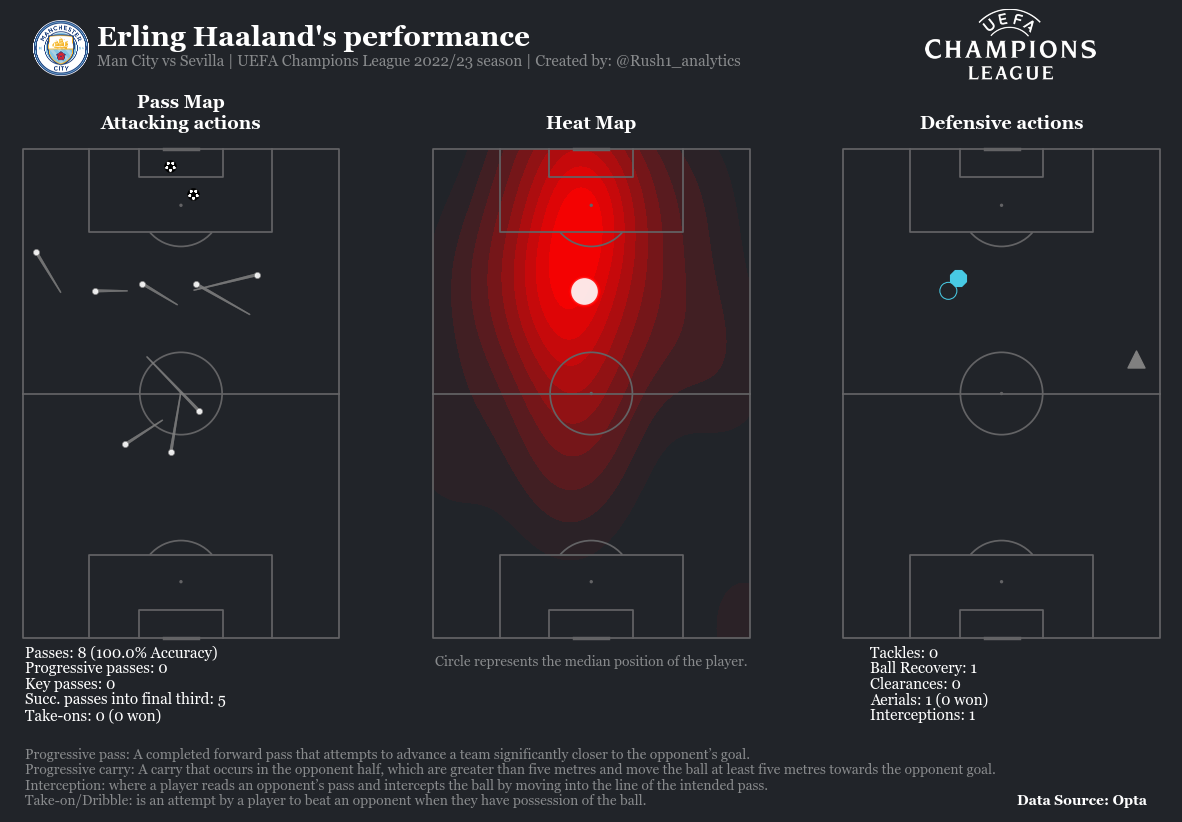

In [309]:
Player = "Erling Haaland"

df_player = df[(df['Player Name']==Player)]
Goal= df[(df['Player Name']==Player)&(df.Action=="Goal")].reset_index()
df_passes = df_player.loc[(df.Action=="Pass")].reset_index()
df_prog = df_player.loc[(df.Action=="Pass")&(df.Outcome=="Successful")].reset_index()
df_df = df_player.loc[df["Action"].isin(["BallRecovery","Aerial","Clearance","TakeOn","Tackle","Interception"])].reset_index(drop=True)
TakeOn=df_player[df_player.Action=='TakeOn'].reset_index()
Interception=df_player[df_player.Action=='Interception'].reset_index()

df_prog['beginning'] = np.sqrt(np.square(100-df_prog['x']) + np.square(100/3 - df_prog['y']))
df_prog['end'] = np.sqrt(np.square(100 - df_prog['endX']) + np.square(100/3 - df_prog['endY']))
df_prog['progressive'] = [(df_prog['end'][x]) / (df_prog['beginning'][x]) < .75 for x in range(len(df_prog.beginning))]

passes = len(df_passes)
pass_succ = len(df_player.loc[(df_player['Outcome']=='Successful')&(df_player.Action=="Pass")])/passes*100
pass_succ = round(pass_succ,2)
progressive_shots = len(df_prog.loc[(df_prog['Outcome']=='Successful')&(df_prog.progressive==True)])
passthird= len(df_passes.loc[(df_passes['Outcome']=='Successful')&(df_passes.x>60)])
tackles = len(df_df.loc[df_df.Action=="Tackle"])
tackles_succ = len(df_df.loc[(df_df.Action=="Tackle")&(df_df.Outcome=="Successful")])
BallRecovery = len(df_df.loc[df_df.Action=="BallRecovery"])
clearance = len(df_df.loc[df_df.Action=="Clearance"])
Aerial= len(df_df.loc[df_df.Action=="Aerial"])
Aerial_succ = len(df_df.loc[(df_df.Action=="Aerial")&(df_df.Outcome=="Successful")])
takeon = len(TakeOn)
takeon_succ = len(TakeOn.loc[(TakeOn.Action=="TakeOn")&(TakeOn.Outcome=="Successful")])
Interception_len = len(Interception)

fig ,ax = plt.subplots(figsize=(15,15.5),ncols=3)
fig.set_facecolor('#212429')
pitch = VerticalPitch(half=False,line_color='#636365',linewidth=1.25,pitch_type="opta")

from matplotlib.colors import LinearSegmentedColormap
customcmap = LinearSegmentedColormap.from_list("indigo - 100 colors",
                                                  ['#212429', 'red'], N=1000)

pitchColor = "white"
lineColor = "#070707"
passColor = "#636669"
faceColor = pitchColor
passColor = '#3371AC'
carryColor = '#DC2228'

for i in range(0,3):
    pitch.draw(ax = ax[i])
    ax[i].patch.set_facecolor('#212429')

pitch.kdeplot(df_player['x'],df_player['y'],
    ax=ax[1], shade=True,shade_lowest=False,cut=3, zorder=-1,cmap = customcmap)

for i in range(len(df_df)):
    if df_df["Outcome"][i]=="Successful":
            if df_df["Action"][i]=="Aerial":
                pitch.scatter(df_df.x[i],df_df.y[i],color="#48cae4",marker="^",s=150,ax=ax[2])
            elif df_df["Action"][i]=="BallRecovery":
                pitch.scatter(df_df.x[i],df_df.y[i],color="none",marker="o",lw=0.75,ec="#48cae4",s=150,ax=ax[2])
            elif df_df["Action"][i]=="Clearance":
                pitch.scatter(df_df.x[i],df_df.y[i],color="#48cae4",marker="*",s=150,ax=ax[2])
            elif df_df["Action"][i]=="Tackle":
                pitch.scatter(df_df.x[i],df_df.y[i],color="#48cae4",marker="s",s=150,ax=ax[2])
            elif df_df["Action"][i]=="Interception":
                pitch.scatter(df_df.x[i],df_df.y[i],color="#48cae4",marker="8",s=150,ax=ax[2])
            elif df_df["Action"][i]=="TakeOn":
                    pitch.scatter(df_df.x[i],df_df.y[i],color="#48cae4",marker="D",s=75,ec='white',ax=ax[0],zorder=5)
    elif df_df["Outcome"][i]=="Unsuccessful":
            if df_df["Action"][i]=="Aerial":
                pitch.scatter(df_df.x[i],df_df.y[i],color="grey",marker="^",s=150,ax=ax[2])
            elif df_df["Action"][i]=="BallRecovery":
                pitch.scatter(df_df.x[i],df_df.y[i],color="grey",marker="o",lw=0.75,ec="#48cae4",s=150,ax=ax[2])
            elif df_df["Action"][i]=="Clearance":
                pitch.scatter(df_df.x[i],df_df.y[i],color="grey",marker="*",s=150,ax=ax[2])
            elif df_df["Action"][i]=="Tackle":
                pitch.scatter(df_df.x[i],df_df.y[i],color="grey",marker="s",s=150,ax=ax[2])
            elif df_df["Action"][i]=="TakeOn":
                    pitch.scatter(df_df.x[i],df_df.y[i],color="grey",marker="D",ec='white',s=75,ax=ax[0])

for i in range(len(df_prog)):
    if df_prog.progressive[i]==True:
            pitch.lines(df_prog["x"][i], df_prog["y"][i],df_prog["endX"][i], df_prog["endY"][i], ax=ax[0],comet = True, color= '#48cae4', lw=2.25, alpha = 0.7,zorder=20)
            pitch.scatter(df_prog["endX"][i], df_prog["endY"][i], edgecolors= '#48cae4', c='#48cae4',s = 20, zorder=4, ax=ax[0], marker = 'o', alpha = 0.9,linewidths=1)

for i in range(len(df_passes)):
    if df_passes["Outcome"][i]=="Successful":
        pitch.lines(df_passes["x"][i], df_passes["y"][i],
                        df_passes["endX"][i], df_passes["endY"][i], 
                        ax=ax[0],comet = True, color= "grey", lw=2.25, alpha = 0.7)
        pitch.scatter(df_passes["endX"][i], df_passes["endY"][i], edgecolors= 'grey', c='white',
                s = 20, zorder=4, ax=ax[0], marker = 'o', alpha = 0.9,linewidths=0.5)
    elif df_passes["Outcome"][i]=="Unsuccessful":
        pitch.lines(df_passes["x"][i], df_passes["y"][i],
                        df_passes["endX"][i], df_passes["endY"][i], 
                        ax=ax[0],comet = True, color= 'red', lw=2.25, alpha = 0.7)
        pitch.scatter(df_passes["endX"][i], df_passes["endY"][i], edgecolors= 'red', c=pitchColor,
                s = 20, zorder=4, ax=ax[0], marker = 'o', alpha = 0.9,linewidths=1)
for i in range(len(Goal)):
    pitch.scatter(Goal["x"][i], Goal["y"][i], c="white",
          s =75, zorder=4, ax=ax[0], marker = 'football',ec='black', alpha = 1)

pitch.scatter(df_player["x"].median(), df_player["y"].median(), edgecolors= passColor, c="white",
          s =450, zorder=4, ax=ax[1], marker = 'o',ec='red',lw=2, alpha = 0.9,linewidths=1)

"""df1 = df_player.loc[(df.isTouch==True) & ((df.x>df.x.mean()-df.x.std()) & (df.x<df.x.mean()+df.x.std())) & ((df.y>df.y.mean()-df.y.std()) & (df.y<df.y.mean()+df.y.std()))].reset_index()
df1 = df1.dropna(subset=['x', 'y'])
#Create an array of the x/y coordinate groups
points = df1[['x', 'y']].values
ax[1].scatter(df1.x,df1.y,zorder=1,color="none",ec='#636365',lw=1.5,s=20)
#Create the convex hull
hull = ConvexHull(df1[['x','y']])

#Loop through each of the hull's simplices
for i in hull.simplices:
    #Draw a black line between each
    ax[1].plot(points[i, 0], points[i, 1], c='white',lw=0.6,zorder=-1,linestyle="--")
    ax[1].fill(points[hull.vertices,0], points[hull.vertices,1], c='white', alpha=0.01)"""

Logo2 = fig.add_axes((0.132,0.69975,0.12*0.45,0.08*0.45))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\Manchester City.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Logo2 = fig.add_axes((0.735,0.682,0.12*0.95,0.08*0.95))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\177-1778939_uefa-champions-league-uefa-champions-league-logo-png.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Header = fig.add_axes((0.15,0.66,0.12*5.25,0.06*1.25))
Header.axis('off')
Header.set_zorder(-1)
Header.set_facecolor('#212429')
Header.grid(False)

Header.text(s=f"{Player}'s performance",x=0.0525,y=0.8,color='white',fontsize=20,fontname="Georgia",fontweight='bold')    
Header.text(s="Man City vs Sevilla | UEFA Champions League 2022/23 season | Created by: @Rush1_analytics",x=0.0525,y=0.625,color='#888a8c',fontsize=11,fontname="Georgia")    

ax[0].set_title('Pass Map\nAttacking actions',fontname="Georgia",color='white',fontweight="bold",fontsize=13)
ax[1].set_title('Heat Map',fontname="Georgia",color='white',fontweight="bold",fontsize=13)
ax[2].set_title('Defensive actions',fontname="Georgia",color='white',fontweight="bold",fontsize=13)

Footer = fig.add_axes((0.135,0.225,0.12*6.3,0.04*2.5))
Footer.axis('off')
Footer.set_zorder(9)
Footer.set_facecolor('#212429')
Footer.grid(False)

Footer.text(s=f"Passes: {passes} ({pass_succ}% Accuracy) ",x=0,y=1,color='white',fontsize=11,fontname="Georgia")
Footer.text(s=f"Progressive passes: {progressive_shots}",x=0,y=0.9,color='white',fontsize=11,fontname="Georgia")
Footer.text(s="Key passes: 0",x=0,y=0.8,color='white',fontsize=11,fontname="Georgia")
Footer.text(s=f"Succ. passes into final third: {passthird}",x=0,y=0.7,color='white',fontsize=11,fontname="Georgia")
Footer.text(s=f"Take-ons: {takeon} ({takeon_succ} won)",x=0,y=0.6,color='white',fontsize=11,fontname="Georgia")

Footer.text(s="Circle represents the median position of the player.",x=0.3615,y=0.95 ,color='#888a8c',fontsize=10,fontname="Georgia")

Footer.text(s="Progressive pass: A completed forward pass that attempts to advance a team significantly closer to the opponent’s goal.",x=0,y=0.35,color='#888a8c',fontsize=10,fontname="Georgia")
Footer.text(s="Progressive carry: A carry that occurs in the opponent half, which are greater than five metres and move the ball at least five metres towards the opponent goal.",x=0,y=0.25,color='#888a8c',fontsize=10,fontname="Georgia")
Footer.text(s="Interception: where a player reads an opponent’s pass and intercepts the ball by moving into the line of the intended pass.",x=0,y=0.15,color='#888a8c',fontsize=10,fontname="Georgia")
Footer.text(s="Take-on/Dribble: is an attempt by a player to beat an opponent when they have possession of the ball.",x=0,y=0.05,color='#888a8c',fontsize=10,fontname="Georgia")

Footer.text(s="Data Source: Opta",x=0.875,y=0.05,color='white',fontsize=10,fontname="Georgia",fontweight='bold')

Footer.text(s=f"Tackles: {tackles}",x=0.745,y=1,color='white',fontsize=11,fontname="Georgia")
Footer.text(s=f"Ball Recovery: {BallRecovery}",x=0.745,y=0.9,color='white',fontsize=11,fontname="Georgia")
Footer.text(s=f"Clearances: {clearance}",x=0.745,y=0.8,color='white',fontsize=11,fontname="Georgia")
Footer.text(s=f"Aerials: {Aerial} ({Aerial_succ} won)",x=0.745,y=0.7,color='white',fontsize=11,fontname="Georgia")
Footer.text(s=f"Interceptions: {Interception_len}",x=0.745,y=0.6,color='white',fontsize=11,fontname="Georgia")

#Footer.text(s="Succ passes into final third:",x=0.72,y=0.25,color='white',fontsize=13,fontname="Georgia",fontweight='bold')
fig.savefig(f"{Player}.png",dpi=300,bbox_inches="tight",facecolor="#212429")

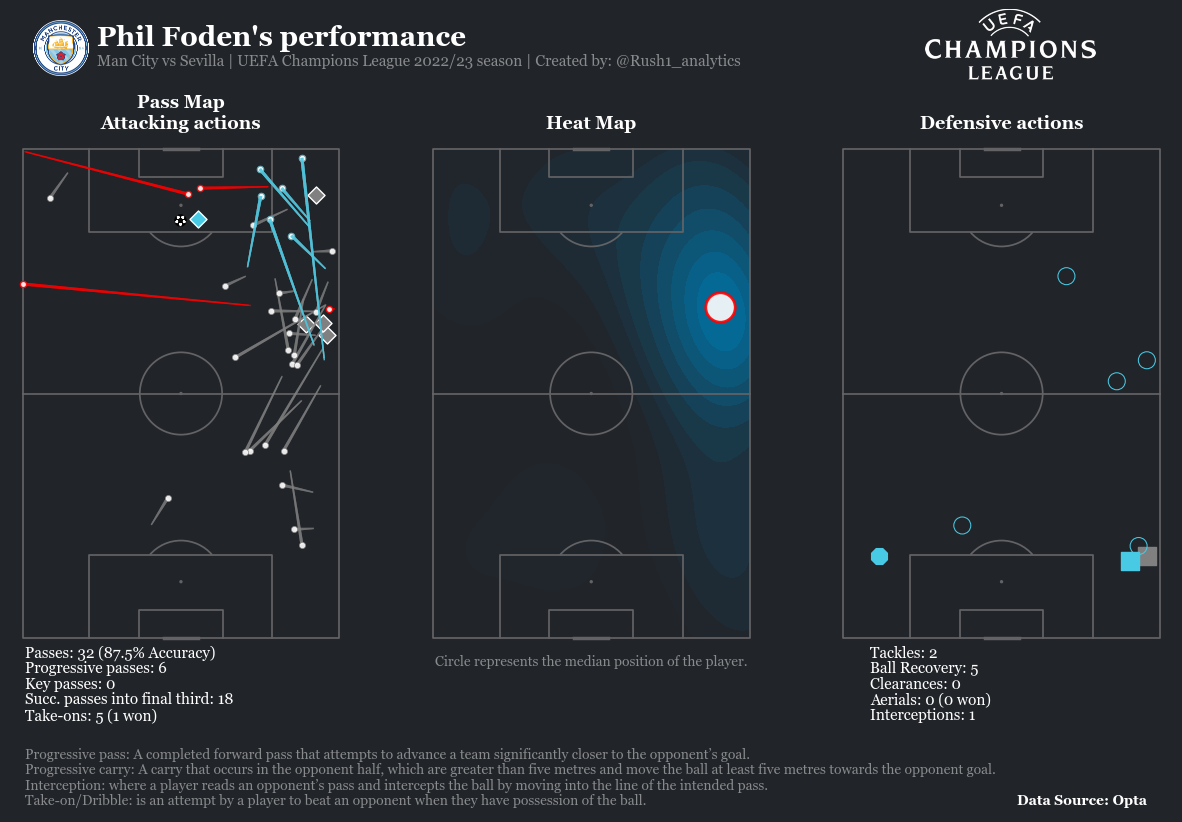

In [177]:
Player = "Phil Foden"

df_player = df[(df['Player Name']==Player)]
Goal= df[(df['Player Name']==Player)&(df.Action=="Goal")].reset_index()
df_passes = df_player.loc[(df.Action=="Pass")].reset_index()
df_prog = df_player.loc[(df.Action=="Pass")&(df.Outcome=="Successful")].reset_index()
df_df = df_player.loc[df["Action"].isin(["BallRecovery","Aerial","Clearance","TakeOn","Tackle","Interception"])].reset_index(drop=True)
TakeOn=df_player[df_player.Action=='TakeOn'].reset_index()
Interception=df_player[df_player.Action=='Interception'].reset_index()

df_prog['beginning'] = np.sqrt(np.square(100-df_prog['x']) + np.square(100/3 - df_prog['y']))
df_prog['end'] = np.sqrt(np.square(100 - df_prog['endX']) + np.square(100/3 - df_prog['endY']))
df_prog['progressive'] = [(df_prog['end'][x]) / (df_prog['beginning'][x]) < .75 for x in range(len(df_prog.beginning))]

passes = len(df_passes)
pass_succ = len(df_player.loc[(df_player['Outcome']=='Successful')&(df_player.Action=="Pass")])/passes*100
pass_succ = round(pass_succ,2)
progressive_shots = len(df_prog.loc[(df_prog['Outcome']=='Successful')&(df_prog.progressive==True)])
passthird= len(df_passes.loc[(df_passes['Outcome']=='Successful')&(df_passes.x>60)])
tackles = len(df_df.loc[df_df.Action=="Tackle"])
tackles_succ = len(df_df.loc[(df_df.Action=="Tackle")&(df_df.Outcome=="Successful")])
BallRecovery = len(df_df.loc[df_df.Action=="BallRecovery"])
clearance = len(df_df.loc[df_df.Action=="Clearance"])
Aerial= len(df_df.loc[df_df.Action=="Aerial"])
Aerial_succ = len(df_df.loc[(df_df.Action=="Aerial")&(df_df.Outcome=="Successful")])
takeon = len(TakeOn)
takeon_succ = len(TakeOn.loc[(TakeOn.Action=="TakeOn")&(TakeOn.Outcome=="Successful")])
Interception_len = len(Interception)

fig ,ax = plt.subplots(figsize=(15,15.5),ncols=3)
fig.set_facecolor('#212429')
pitch = VerticalPitch(half=False,line_color='#636365',linewidth=1.25,pitch_type="opta")

from matplotlib.colors import LinearSegmentedColormap
customcmap = LinearSegmentedColormap.from_list("indigo - 100 colors",
                                                  ['#212429', '#036D9C'], N=1000)

pitchColor = "white"
lineColor = "#070707"
passColor = "#636669"
faceColor = pitchColor
passColor = '#3371AC'
carryColor = '#DC2228'

for i in range(0,3):
    pitch.draw(ax = ax[i])
    ax[i].patch.set_facecolor('#212429')

pitch.kdeplot(df_player['x'],df_player['y'],
    ax=ax[1], shade=True,shade_lowest=False,cut=3, zorder=-1,cmap = customcmap)

for i in range(len(df_df)):
    if df_df["Outcome"][i]=="Successful":
            if df_df["Action"][i]=="Aerial":
                pitch.scatter(df_df.x[i],df_df.y[i],color="#48cae4",marker="^",s=150,ax=ax[2])
            elif df_df["Action"][i]=="BallRecovery":
                pitch.scatter(df_df.x[i],df_df.y[i],color="none",marker="o",lw=0.75,ec="#48cae4",s=150,ax=ax[2])
            elif df_df["Action"][i]=="Clearance":
                pitch.scatter(df_df.x[i],df_df.y[i],color="#48cae4",marker="*",s=150,ax=ax[2])
            elif df_df["Action"][i]=="Tackle":
                pitch.scatter(df_df.x[i],df_df.y[i],color="#48cae4",marker="s",s=150,ax=ax[2])
            elif df_df["Action"][i]=="Interception":
                pitch.scatter(df_df.x[i],df_df.y[i],color="#48cae4",marker="8",s=150,ax=ax[2])
            elif df_df["Action"][i]=="TakeOn":
                    pitch.scatter(df_df.x[i],df_df.y[i],color="#48cae4",marker="D",s=75,ec='white',ax=ax[0],zorder=5)
    elif df_df["Outcome"][i]=="Unsuccessful":
            if df_df["Action"][i]=="Aerial":
                pitch.scatter(df_df.x[i],df_df.y[i],color="grey",marker="^",s=150,ax=ax[2])
            elif df_df["Action"][i]=="BallRecovery":
                pitch.scatter(df_df.x[i],df_df.y[i],color="grey",marker="o",lw=0.75,ec="#48cae4",s=150,ax=ax[2])
            elif df_df["Action"][i]=="Clearance":
                pitch.scatter(df_df.x[i],df_df.y[i],color="grey",marker="*",s=150,ax=ax[2])
            elif df_df["Action"][i]=="Tackle":
                pitch.scatter(df_df.x[i],df_df.y[i],color="grey",marker="s",s=150,ax=ax[2])
            elif df_df["Action"][i]=="TakeOn":
                    pitch.scatter(df_df.x[i],df_df.y[i],color="grey",marker="D",ec='white',s=75,ax=ax[0])

for i in range(len(df_prog)):
    if df_prog.progressive[i]==True:
            pitch.lines(df_prog["x"][i], df_prog["y"][i],df_prog["endX"][i], df_prog["endY"][i], ax=ax[0],comet = True, color= '#48cae4', lw=2.25, alpha = 0.7,zorder=20)
            pitch.scatter(df_prog["endX"][i], df_prog["endY"][i], edgecolors= '#48cae4', c='#48cae4',s = 20, zorder=4, ax=ax[0], marker = 'o', alpha = 0.9,linewidths=1)

for i in range(len(df_passes)):
    if df_passes["Outcome"][i]=="Successful":
        pitch.lines(df_passes["x"][i], df_passes["y"][i],
                        df_passes["endX"][i], df_passes["endY"][i], 
                        ax=ax[0],comet = True, color= "grey", lw=2.25, alpha = 0.7)
        pitch.scatter(df_passes["endX"][i], df_passes["endY"][i], edgecolors= 'grey', c='white',
                s = 20, zorder=4, ax=ax[0], marker = 'o', alpha = 0.9,linewidths=0.5)
    elif df_passes["Outcome"][i]=="Unsuccessful":
        pitch.lines(df_passes["x"][i], df_passes["y"][i],
                        df_passes["endX"][i], df_passes["endY"][i], 
                        ax=ax[0],comet = True, color= 'red', lw=2.25, alpha = 0.7)
        pitch.scatter(df_passes["endX"][i], df_passes["endY"][i], edgecolors= 'red', c=pitchColor,
                s = 20, zorder=4, ax=ax[0], marker = 'o', alpha = 0.9,linewidths=1)
for i in range(len(Goal)):
    pitch.scatter(Goal["x"][i], Goal["y"][i], c="white",
          s =75, zorder=4, ax=ax[0], marker = 'football',ec='black', alpha = 1)

pitch.scatter(df_player["x"].median(), df_player["y"].median(), edgecolors= passColor, c="white",
          s =450, zorder=4, ax=ax[1], marker = 'o',ec='red',lw=2, alpha = 0.9,linewidths=1)

"""df1 = df_player.loc[(df.isTouch==True) & ((df.x>df.x.mean()-df.x.std()) & (df.x<df.x.mean()+df.x.std())) & ((df.y>df.y.mean()-df.y.std()) & (df.y<df.y.mean()+df.y.std()))].reset_index()
df1 = df1.dropna(subset=['x', 'y'])
#Create an array of the x/y coordinate groups
points = df1[['x', 'y']].values
ax[1].scatter(df1.x,df1.y,zorder=1,color="none",ec='#636365',lw=1.5,s=20)
#Create the convex hull
hull = ConvexHull(df1[['x','y']])

#Loop through each of the hull's simplices
for i in hull.simplices:
    #Draw a black line between each
    ax[1].plot(points[i, 0], points[i, 1], c='white',lw=0.6,zorder=-1,linestyle="--")
    ax[1].fill(points[hull.vertices,0], points[hull.vertices,1], c='white', alpha=0.01)"""

Logo2 = fig.add_axes((0.132,0.69975,0.12*0.45,0.08*0.45))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\Manchester City.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Logo2 = fig.add_axes((0.735,0.682,0.12*0.95,0.08*0.95))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\177-1778939_uefa-champions-league-uefa-champions-league-logo-png.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Header = fig.add_axes((0.15,0.66,0.12*5.25,0.06*1.25))
Header.axis('off')
Header.set_zorder(-1)
Header.set_facecolor('#212429')
Header.grid(False)

Header.text(s=f"{Player}'s performance",x=0.0525,y=0.8,color='white',fontsize=20,fontname="Georgia",fontweight='bold')    
Header.text(s="Man City vs Sevilla | UEFA Champions League 2022/23 season | Created by: @Rush1_analytics",x=0.0525,y=0.625,color='#888a8c',fontsize=11,fontname="Georgia")    

ax[0].set_title('Pass Map\nAttacking actions',fontname="Georgia",color='white',fontweight="bold",fontsize=13)
ax[1].set_title('Heat Map',fontname="Georgia",color='white',fontweight="bold",fontsize=13)
ax[2].set_title('Defensive actions',fontname="Georgia",color='white',fontweight="bold",fontsize=13)

Footer = fig.add_axes((0.135,0.225,0.12*6.3,0.04*2.5))
Footer.axis('off')
Footer.set_zorder(9)
Footer.set_facecolor('#212429')
Footer.grid(False)

Footer.text(s=f"Passes: {passes} ({pass_succ}% Accuracy) ",x=0,y=1,color='white',fontsize=11,fontname="Georgia")
Footer.text(s=f"Progressive passes: {progressive_shots}",x=0,y=0.9,color='white',fontsize=11,fontname="Georgia")
Footer.text(s="Key passes: 0",x=0,y=0.8,color='white',fontsize=11,fontname="Georgia")
Footer.text(s=f"Succ. passes into final third: {passthird}",x=0,y=0.7,color='white',fontsize=11,fontname="Georgia")
Footer.text(s=f"Take-ons: {takeon} ({takeon_succ} won)",x=0,y=0.6,color='white',fontsize=11,fontname="Georgia")

Footer.text(s="Circle represents the median position of the player.",x=0.3615,y=0.95 ,color='#888a8c',fontsize=10,fontname="Georgia")

Footer.text(s="Progressive pass: A completed forward pass that attempts to advance a team significantly closer to the opponent’s goal.",x=0,y=0.35,color='#888a8c',fontsize=10,fontname="Georgia")
Footer.text(s="Progressive carry: A carry that occurs in the opponent half, which are greater than five metres and move the ball at least five metres towards the opponent goal.",x=0,y=0.25,color='#888a8c',fontsize=10,fontname="Georgia")
Footer.text(s="Interception: where a player reads an opponent’s pass and intercepts the ball by moving into the line of the intended pass.",x=0,y=0.15,color='#888a8c',fontsize=10,fontname="Georgia")
Footer.text(s="Take-on/Dribble: is an attempt by a player to beat an opponent when they have possession of the ball.",x=0,y=0.05,color='#888a8c',fontsize=10,fontname="Georgia")

Footer.text(s="Data Source: Opta",x=0.875,y=0.05,color='white',fontsize=10,fontname="Georgia",fontweight='bold')

Footer.text(s=f"Tackles: {tackles}",x=0.745,y=1,color='white',fontsize=11,fontname="Georgia")
Footer.text(s=f"Ball Recovery: {BallRecovery}",x=0.745,y=0.9,color='white',fontsize=11,fontname="Georgia")
Footer.text(s=f"Clearances: {clearance}",x=0.745,y=0.8,color='white',fontsize=11,fontname="Georgia")
Footer.text(s=f"Aerials: {Aerial} ({Aerial_succ} won)",x=0.745,y=0.7,color='white',fontsize=11,fontname="Georgia")
Footer.text(s=f"Interceptions: {Interception_len}",x=0.745,y=0.6,color='white',fontsize=11,fontname="Georgia")

#Footer.text(s="Succ passes into final third:",x=0.72,y=0.25,color='white',fontsize=13,fontname="Georgia",fontweight='bold')
fig.savefig(f"{Player}.png",dpi=300,bbox_inches="tight",facecolor="#212429")